## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot creating the charts
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe
- `numpy` is used to generate some data

The **Anova test** will be done using `scipy`: install it using the `pip install scipy` command

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Dataset

Let's create a dummy dataset. Three groups are made up: `A`, `B` and `C`. 

For each of them, 100 random values are created thanks to the `np.random.normal()` function, but with different mean values.

In [2]:
sample_size = 100

groupA = np.random.normal(10, 10, sample_size)
groupB = np.random.normal(70, 10, sample_size)
groupC = np.random.normal(40, 10, sample_size)

category = ['GroupA']*sample_size + ['GroupB']*sample_size + ['GroupC']*sample_size

df = pd.DataFrame({'value': np.concatenate([groupA, groupB, groupC]),
                   'category': category})

## Get statistical values

First, we'll start by retrieving the values we want to add on the plot: the **p value** and the **F statistic**. For this, we need to use the `f_oneway()` function from `scipy`.

Also, we retrieve the **mean** of each group.

*Important: This post does not cover any statistical/math details*

In [3]:
# groups
groupA = df[df['category']=='GroupA']['value']
groupB = df[df['category']=='GroupB']['value']
groupC = df[df['category']=='GroupC']['value']

# Perform a paired t-test
F_statistic, p_value = stats.f_oneway(groupA, groupB, groupC)

# Get means
mean_groupA = groupA.mean()
mean_groupB = groupB.mean()
mean_groupC = groupC.mean()

# Print the results
print("T-statistic:", F_statistic)
print("P-value:", p_value)
print("Mean groupA:", mean_groupA)
print("Mean groupB:", mean_groupB)
print("Mean groupC:", mean_groupC)

T-statistic: 960.8980055803397
P-value: 2.0225642197230424e-130
Mean groupA: 8.745526783582141
Mean groupB: 70.56101076624377
Mean groupC: 40.310280651985394


Let's **round them** in order to make the chart **more readable** at the end

In [4]:
F_statistic = round(F_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_groupA = round(mean_groupA,2)
mean_groupB = round(mean_groupB,2)
mean_groupC = round(mean_groupC,2)

## Boxplot with statistical elements

Now let's use the stats we got above and add them to the plot of [boxplots](https://python-graph-gallery.com/boxplot/) of each group using the `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/).

For this graph, we'll also add the **average of each group** next to its associated [boxplot](https://python-graph-gallery.com/boxplot/). 

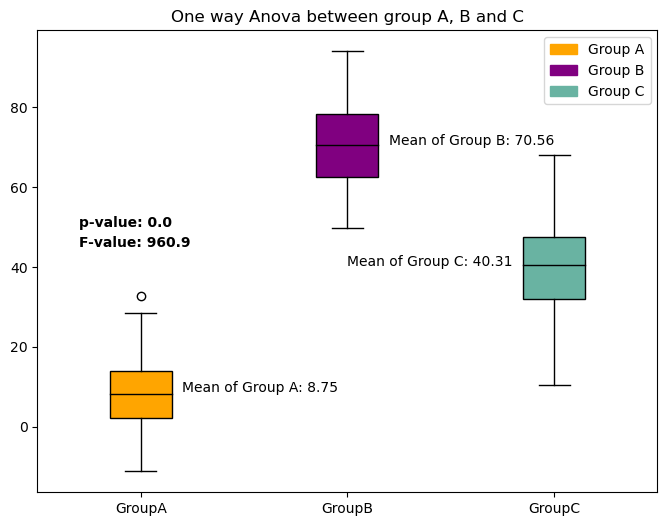

In [5]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
f_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, f_value_text, weight='bold')

# Add the mean for each group
ax.text(1.2, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.2, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

## Violin plot with statistical elements

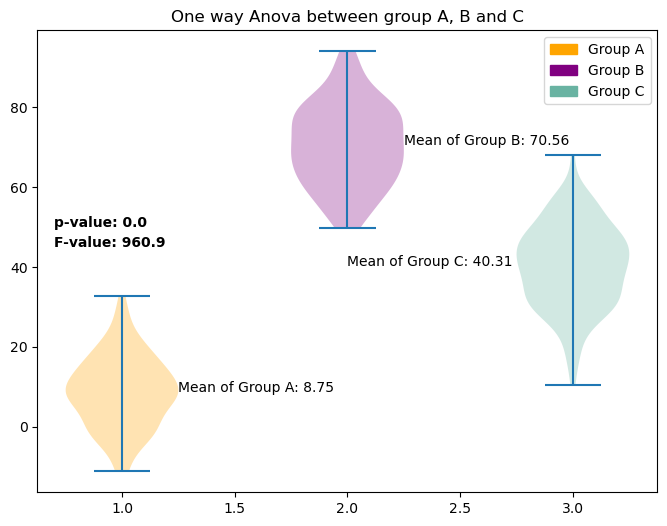

In [6]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
violins = ax.violinplot([group.values for name, group in grouped],
                     #labels=grouped.groups.keys()
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for violin, color in zip(violins['bodies'], colors):
    violin.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
F_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, F_value_text, weight='bold')

# Add the mean for each group
ax.text(1.25, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.25, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

## Customized violin plot with statistics

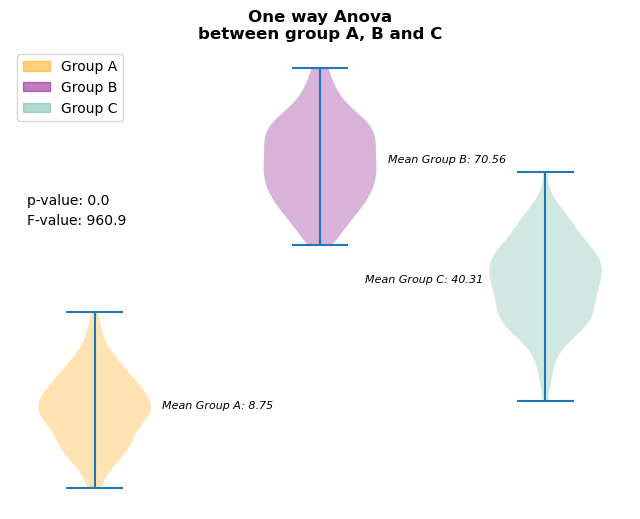

In [7]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
violins = ax.violinplot([group.values for name, group in grouped],
                     #labels=grouped.groups.keys()
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for violin, color in zip(violins['bodies'], colors):
    violin.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 60, p_value_text)
F_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 55, F_value_text)

# Add the mean for each group
ax.text(1.3, mean_groupA, f'Mean Group A: {mean_groupA}',
        style='italic', fontsize=8)
ax.text(2.3, mean_groupB, f'Mean Group B: {mean_groupB}',
        style='italic', fontsize=8)
ax.text(2.2, mean_groupC, f'Mean Group C: {mean_groupC}',
        style='italic', fontsize=8)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Removes spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Add a title and axis label
ax.set_title('One way Anova\nbetween group A, B and C', weight='bold')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.5) for color in colors]
ax.legend(legend_handles, legend_labels, loc='upper left')

# Display it
plt.show()

## Going further

This post explains how to represent the **results of an Anova** in a [violin plot](https://python-graph-gallery.com/violin-plot/) and a [boxplot](https://python-graph-gallery.com/boxplot/).

For more examples of **charts with statistics**, see the [statistics section](https://python-graph-gallery.com/statistics/). You may also be interested in how to [represent Student t-test results](https://python-graph-gallery.com/551-student-t-test-visualization).